In [2]:
# the libraries
import numpy as np
import matplotlib.pyplot as plt
from plasmapy.dispersion import plasma_dispersion_func as pdf
from scipy import constants as cn

In [3]:
# energy is in kilo-electron volts
def energ_to_freq(E):
    # E = hf => f = E/h
    freq_hz = (E*1000*cn.e)/cn.h
    return freq_hz*np.pi/180

In [13]:
E_i = np.array([0.02,0.2,2,10,20,40,60,70])

In [14]:
# classical electron radius
r_e =  (1/(4*cn.pi*cn.epsilon_0))*(cn.e**2/(cn.m_e*cn.c**2))
# choose initial energy and frequency
#E_i = 40 # kev
w_i = 2*cn.pi*energ_to_freq(E_i) # initial frequency
w_c = 2*cn.pi*energ_to_freq(20)  # cyclotron frequency at 20 keV
gamma_r = (2*cn.e**2*w_i**2)/(2*cn.m_e*cn.c**3)
n_e = 5*10**27 # in m^-3
B = 4.141*10**12
B_c = 4.141*10**13
w_p = np.sqrt((4*cn.pi*cn.e**2*n_e)/cn.m_e)# the plasma frequency

In [15]:
def spd_calc(theta, w_c, w_p, w_i):
    u = w_c/w_i
    v = w_p/w_i
    delta = (cn.e**2/(cn.hbar*cn.c))**2*(45*cn.pi)**(-1)*(B/B_c)**2
    elec_en = 10*cn.e*1000 # J (10 keV)
    s = (elec_en/cn.m_e)**(1/2)
    k = w_i*np.cos(theta)/cn.c
    a = cn.hbar*k*np.cos(theta)/(2*cn.m_e*2**(1/2)*s)
    yp = (w_i + w_c)/(2**(1/2)*s*np.abs(k*np.cos(theta))) + a
    ym = (w_i - w_c)/(2**(1/2)*s*np.abs(k*np.cos(theta))) - a
    z = w_i/(2**(1/2)*s*np.abs(k*np.cos(theta)))

    wym = pdf(ym)
    wyp = pdf(yp)
    wzpa = pdf(z+a)
    wzma = pdf(z-a)

    S = -v*(1 - (1/2)*w_c*(2*elec_en/cn.m_e)**(-1/2)*np.abs(k*np.cos(theta))**(-1)*(wym - wyp))
    D = v*(1/2)*w_c*(2*elec_en/cn.m_e)**(-1/2)*np.abs(k*np.cos(theta))**(-1)*(wyp + wym)
    P = -v*(z**2/(2*a))*(wzpa - wzma)

    b = -np.sin(theta)**2*(2*np.cos(theta))**(-1)*D**(-1)*(P-S+3*delta)
    alpha = b*(1 - (1 + b**(-2))**(1/2))
    print(alpha)
    return alpha

In [16]:
# def ellipticity(theta,w_c,w_p,w_i):
#     u = w_c/w_i
#     v = w_p/w_i
#     delta = (cn.e**2/(cn.hbar*cn.c))**2*(45*cn.pi)**(-1)*(B/B_c)**2
#     print(delta)
#     b = u**(1/2)*(np.sin(theta))**2*(2*np.cos(theta)*(1-v))**(-1)*(1 + delta*3*(u*v)*(-1)*(1-u))
#     # b = u**(1/2)*(np.sin(theta))**2*(2*np.cos(theta)*(1-v))**(-1)
#     alpha = -b**(-1)*(1 + (1 + b**(-2))**(1/2))**(-1)
#     return alpha

In [17]:
angles = np.linspace(0.1,90,100)

[-9.98378590e-01-5.57756054e-012j -8.48598693e-01-4.68417514e-010j
 -5.68219473e-01-9.49087103e-010j -3.41279415e-01-8.27346885e-010j
 -2.11288941e-01-5.42236002e-010j -1.40248728e-01-3.38091672e-010j
 -9.90753450e-02-2.12220032e-010j -7.34844128e-02-1.34823379e-010j
 -5.65971173e-02-8.62390082e-011j -4.49002107e-02-5.51850765e-011j
 -3.64754710e-02-3.51267931e-011j -3.02108579e-02-2.21336342e-011j
 -2.54278703e-02-1.37489878e-011j -2.16942379e-02-8.38922233e-012j
 -1.87242734e-02-5.01171225e-012j -1.63231499e-02-2.92240304e-012j
 -1.43543596e-02-1.65848905e-012j -1.27199776e-02-9.13380865e-013j
 -1.13482910e-02-4.86741799e-013j -1.01858150e-02-2.50243708e-013j
 -9.19200630e-03-1.23738777e-013j -8.33568126e-03-5.86568790e-014j
 -7.59253916e-03-2.65650015e-014j -6.94341706e-03-1.14520677e-014j
 -6.37303978e-03-4.68088100e-015j -5.86911076e-03-1.80630310e-015j
 -5.42164146e-03-6.55038745e-016j -5.02245059e-03-2.22113270e-016j
 -4.66478555e-03-7.00377830e-017j -4.34303321e-03-2.04143927e-

Text(0, 0.5, '$\\alpha(\\vartheta)$')

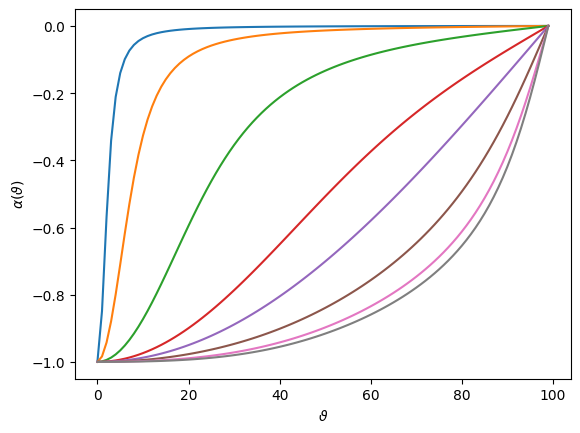

In [18]:
for freq in w_i:
    ellip = spd_calc(angles*np.pi/180,w_c,w_p,freq)
    rellip = ellip.real
    iellip = ellip.imag
    ell2 = rellip**2 + iellip**2
    #plt.plot(np.sqrt(ell))
    plt.plot(rellip)
plt.xlabel(r'$\vartheta$')
plt.ylabel(r'$\alpha(\vartheta)$')

In [19]:
#n_e = np.array([5e12,5e17,5e22,5e27,5e35,5e45,5e00]) # number density in m^-3
n_e = np.array([1e24,1e26,1e27,5.1e27,5.6e27,1e28,2e28,5e29])
w_p = np.sqrt((4*cn.pi*cn.e**2*n_e)/cn.m_e)# the plasma frequency
E_i = 5.9

In [20]:
w_i = 2*cn.pi*energ_to_freq(E_i) # initial frequency

In [12]:
w_p

array([5.95073798e+08, 5.95073798e+09, 1.88178858e+10, 4.24967694e+10,
       4.45312454e+10, 5.95073798e+10, 8.41561436e+10, 4.20780718e+11])

Text(0, 0.5, '$\\alpha(\\vartheta)$')

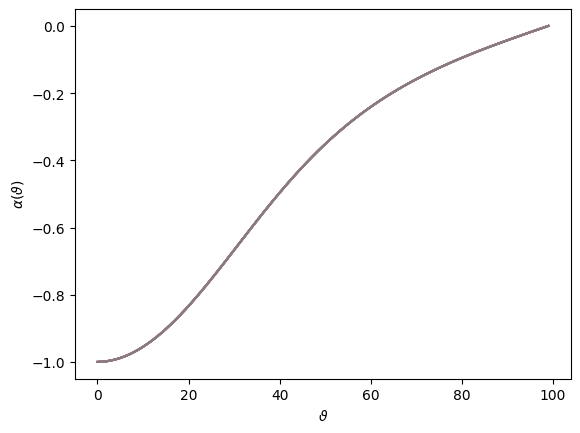

In [78]:
for freq in w_p:
    ellip = spd_calc(angles*np.pi/180,w_c,freq,w_i).real
    plt.plot(ellip)
plt.xlabel(r'$\vartheta$')
plt.ylabel(r'$\alpha(\vartheta)$')